# Credit Fraud Detection

Anonymized credit card transactions labeled as fraudulent or genuine

* Source: https://www.kaggle.com/datasets/whenamancodes/fraud-detection

## About Data
The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive fallsBin (frauds) account for 0.172% of all transactions.


It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'fallsBin' is the response variable and it takes value 1 in case of fraud and 0 otherwise.


Given the fallsBin imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced fallsBinification.

# 1. Importing relevant libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from collections import Counter

sns.set_theme()
%matplotlib inline

# 2. Loading raw data

In [2]:
df_raw = pd.read_csv('./stats/dataClean v2.csv')

# 3. EDA

In [3]:
df_raw.describe(include='all')

,time,time_diff,speed,time_sd,speed_sd,left_knee_range_mean,left_knee_sd,left_knee_max,left_knee_min,left_knee_max_mean,...,PA_cat,avgPEM,avgAAM,totalSEE,numMedCond,EthCat,backpain,depression,highBP,fallsBin
count,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,...,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000
mean,11.399489,-0.032526,0.479259,0.297645,0.060289,75.020313,28.104719,181.427319,99.974044,177.768137,...,1.730864,2.909347,4.372346,5.798628,0.449383,1.869136,0.081481,0.039506,0.061728,0.083951
std,3.438198,0.167090,0.149598,0.213380,0.032491,13.158496,4.831591,9.681466,12.081305,7.173996,...,0.548770,0.506670,0.729319,2.220638,0.838747,1.599864,0.273911,0.195037,0.240959,0.277657
min,4.273743,-1.076075,0.150000,0.023570,0.004926,39.348432,13.726089,150.001030,64.868991,141.057238,...,0.000000,1.428571,2.200000,0.444444,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,9.142467,-0.133333,0.370000,0.142984,0.037602,67.080816,24.755811,177.265613,91.549496,173.811689,...,2.000000,2.571429,3.800000,4.333333,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,11.100000,0.000000,0.450000,0.256728,0.056387,75.027600,28.112304,182.158476,98.835265,178.936059,...,2.000000,2.857143,4.600000,5.666667,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,13.396717,0.066667,0.550000,0.395348,0.075829,82.675616,31.291464,185.674904,107.472409,182.094204,...,2.000000,3.285714,5.000000,7.555556,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000
max,32.875000,0.444444,1.170000,1.759357,0.197080,166.563105,43.483095,315.853310,139.121574,203.131355,...,2.000000,4.000000,6.400000,10.000000,4.000000,8.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
df = df_raw.copy()

In [5]:
df.head(10)

,time,time_diff,speed,time_sd,speed_sd,left_knee_range_mean,left_knee_sd,left_knee_max,left_knee_min,left_knee_max_mean,...,PA_cat,avgPEM,avgAAM,totalSEE,numMedCond,EthCat,backpain,depression,highBP,fallsBin
0,18.752067,-0.275275,0.27,0.631539,0.058177,66.356510,29.013062,174.921910,92.965645,173.194095,...,2,3.142857,5.0,7.333333,3,1,0,0,0,0
1,13.346667,-0.216883,0.37,0.395926,0.071269,69.628002,26.293871,188.856174,110.926374,184.429725,...,2,3.000000,4.8,4.666667,0,1,0,0,0,0
2,9.175833,0.108442,0.54,0.152175,0.044839,80.953823,30.219053,181.651735,96.723395,180.520050,...,2,2.142857,3.4,2.888889,0,1,0,0,0,0
3,13.791667,0.133333,0.36,0.234965,0.031573,72.900182,29.519413,184.377372,103.622265,180.242772,...,2,3.142857,5.2,6.777778,0,1,0,0,0,0
4,11.444767,-0.108442,0.44,0.225910,0.045701,71.881103,27.642812,186.287796,104.791805,179.420205,...,2,2.857143,4.8,5.333333,0,1,0,0,0,0
5,15.335196,0.290503,0.33,0.343064,0.033051,61.125035,24.674736,160.148816,93.006604,157.793916,...,1,2.714286,4.0,6.000000,0,2,0,0,0,0
6,8.074733,0.116783,0.62,0.182269,0.062009,84.412458,32.719694,182.194770,93.156205,179.314138,...,2,3.142857,4.8,5.000000,0,7,0,0,0,0
7,11.533333,0.225000,0.43,0.307246,0.053349,75.400917,26.496098,170.224432,87.070665,167.014213,...,2,2.714286,5.6,4.444444,3,1,1,0,0,0
8,14.366667,-0.125000,0.35,0.252455,0.034228,90.244337,35.676816,188.488400,93.414279,186.552916,...,2,3.714286,5.2,10.000000,0,1,0,0,0,0
9,12.312300,0.116783,0.41,0.396151,0.064677,67.426792,23.996676,170.395482,98.561011,168.342489,...,2,3.428571,5.0,7.333333,1,1,0,0,1,0


In [6]:
df.shape

(405, 527)

In [7]:
df.isnull().sum()

time          0
time_diff     0
speed         0
time_sd       0
speed_sd      0
             ..
EthCat        0
backpain      0
depression    0
highBP        0
fallsBin      0
Length: 527, dtype: int64

In [8]:
# We have no null values

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405 entries, 0 to 404
Columns: 527 entries, time to fallsBin
dtypes: float64(500), int64(27)
memory usage: 1.6 MB


In [10]:
# There is a huge disproportion in data. Only 0,17% is a fraud data.

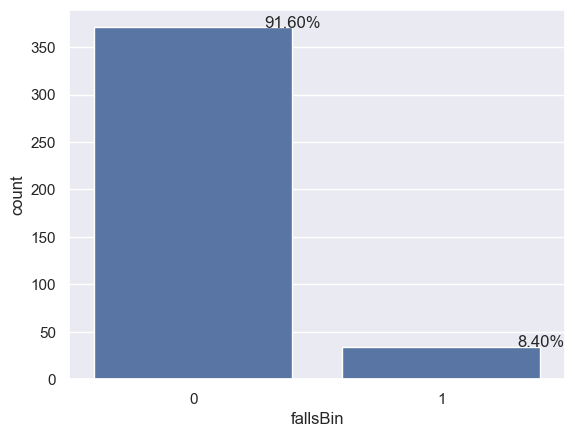

In [11]:
ax = sns.countplot(x='fallsBin',data=df)
total = float(len(df))
for p in ax.patches:
    percentage="{:.2f}%".format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha="center")
plt.show()

## Correlations and most important features

In [12]:
df.corr()['fallsBin'].sort_values()

right_hip_max                  -0.183390
right_hip_max_mean_stand2sit   -0.180254
right_hip_max_mean             -0.172185
right_hip_max_stand2sit        -0.168242
GPH_TScore                     -0.146906
                                  ...   
highBP                          0.181331
Age                             0.200309
MedicalConditions_PA            0.218328
numMedCond                      0.230866
fallsBin                        1.000000
Name: fallsBin, Length: 527, dtype: float64

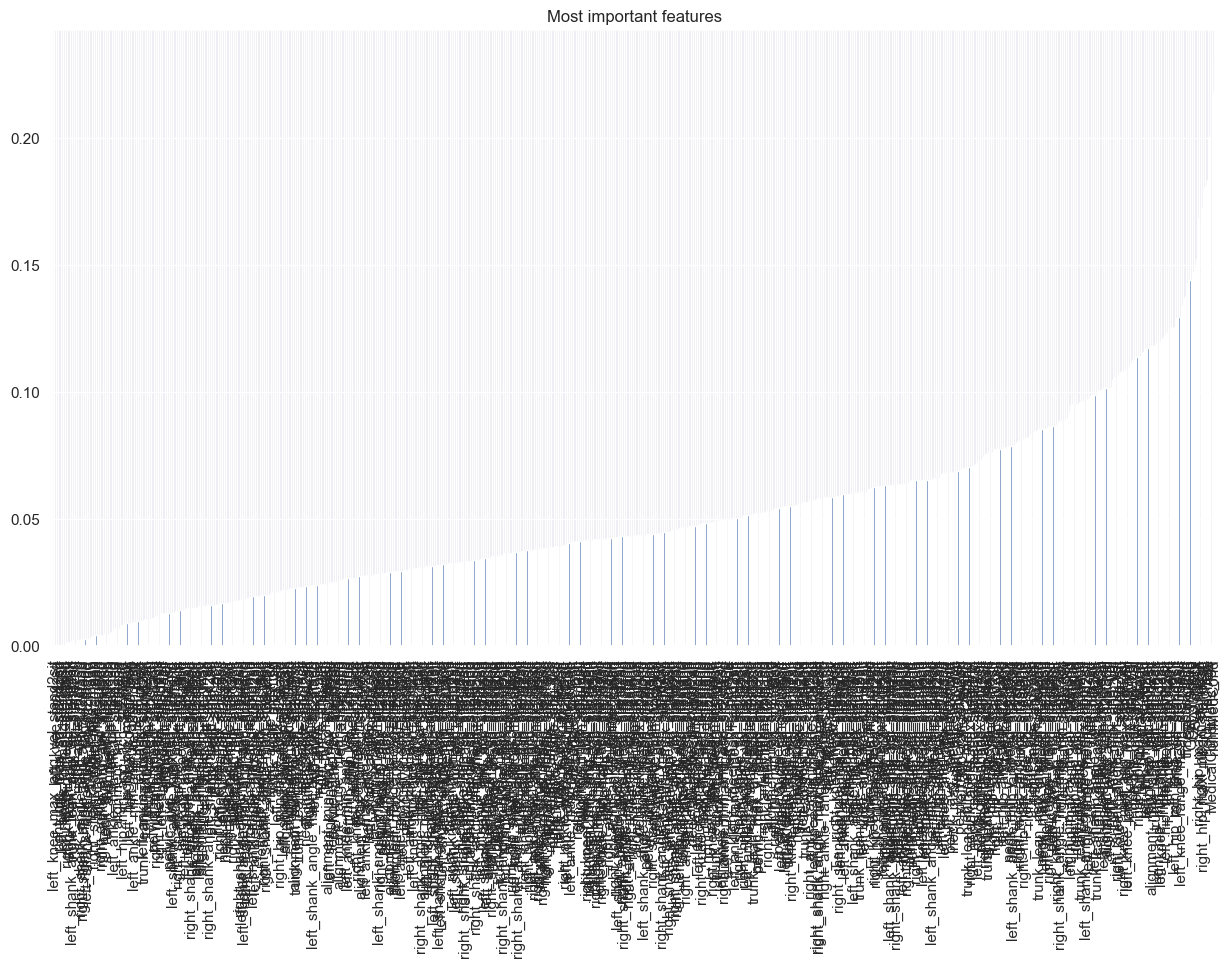

In [13]:
plt.figure(figsize=(15,8))
d = df.corr()['fallsBin'][:-1].abs().sort_values().plot(kind='bar', title='Most important features')

plt.show()

In [16]:
# Let's peak all features with correlation 0.15 and morec = 

c = df.corr()['fallsBin'][:-1].abs() > 0.11

c_true = c[c == True]

c_true



time                               True
left_knee_sd                       True
left_knee_max_ang_vel              True
left_knee_min_ang_vel              True
left_hip_max                       True
left_hip_max_mean                  True
left_hip_min_ang_vel               True
right_hip_max                      True
right_hip_max_mean                 True
right_hip_max_ang_vel              True
right_hip_min_ang_vel              True
trunk_lean_min_ang_acc             True
time_diff_sit2stand                True
right_hip_max_sit2stand            True
time_stand2sit                     True
time_diff_stand2sit                True
left_knee_range_mean_stand2sit     True
left_knee_sd_stand2sit             True
left_knee_min_ang_vel_stand2sit    True
left_hip_sd_stand2sit              True
left_hip_max_stand2sit             True
left_hip_max_mean_stand2sit        True
left_hip_min_ang_vel_stand2sit     True
right_hip_sd_stand2sit             True
right_hip_max_stand2sit            True


In [19]:
x = df.corr()['fallsBin'][:-1].abs()

array([9.01651740e-05, 1.81400724e-04, 2.41394221e-04, 3.39749330e-04,
       4.95136098e-04, 1.43254473e-03, 1.50069226e-03, 1.55844723e-03,
       1.96688555e-03, 2.14253268e-03, 2.31808301e-03, 2.37577627e-03,
       2.52447918e-03, 2.52447918e-03, 2.63220515e-03, 2.69575496e-03,
       2.92731320e-03, 3.70624356e-03, 3.96295761e-03, 4.17497038e-03,
       4.29038845e-03, 4.32814173e-03, 4.32814173e-03, 4.79699542e-03,
       4.79699542e-03, 4.85031376e-03, 5.49131563e-03, 6.72725708e-03,
       6.86317264e-03, 7.00371608e-03, 8.07626249e-03, 8.36425184e-03,
       8.75758922e-03, 8.79206544e-03, 9.09853164e-03, 9.20033804e-03,
       9.28438539e-03, 9.55963857e-03, 9.72300575e-03, 9.83065621e-03,
       1.02104078e-02, 1.05306767e-02, 1.05731147e-02, 1.05789882e-02,
       1.08355024e-02, 1.08530244e-02, 1.12294521e-02, 1.16889833e-02,
       1.27720231e-02, 1.28013634e-02, 1.28313677e-02, 1.28313677e-02,
       1.29434954e-02, 1.29434954e-02, 1.30523370e-02, 1.35833397e-02,
      

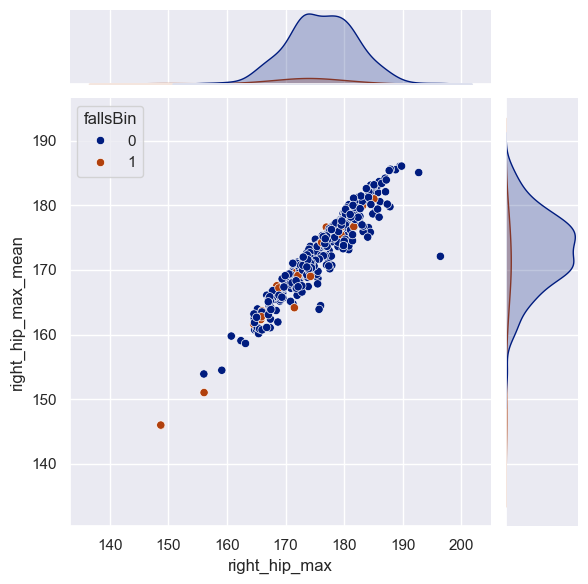

In [23]:
sns.jointplot(x='right_hip_max', y='right_hip_max_mean',hue='fallsBin', data=df, palette = 'dark')

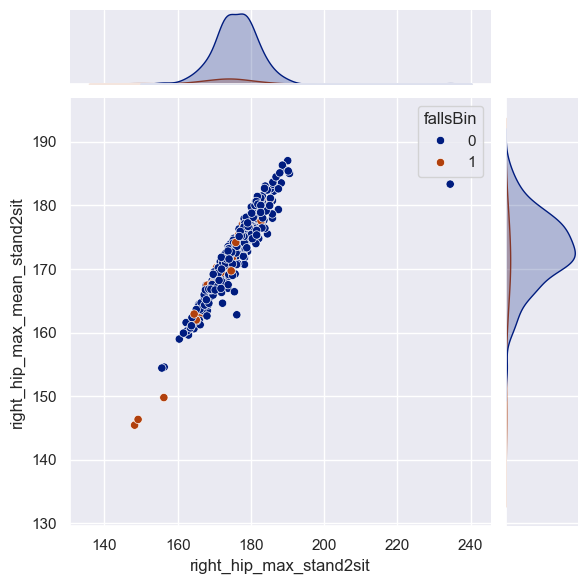

In [24]:
sns.jointplot(x='right_hip_max_stand2sit', y='right_hip_max_mean_stand2sit',hue='fallsBin', data=df, palette = 'dark')

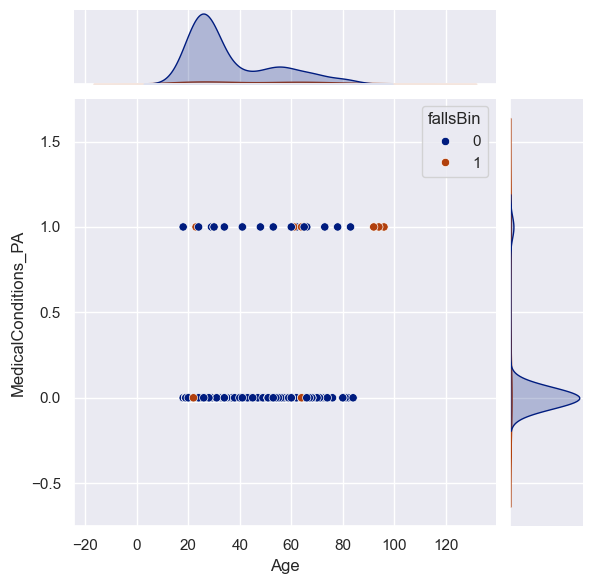

In [25]:
sns.jointplot(x='Age', y='MedicalConditions_PA',hue='fallsBin', data=df, palette = 'dark')

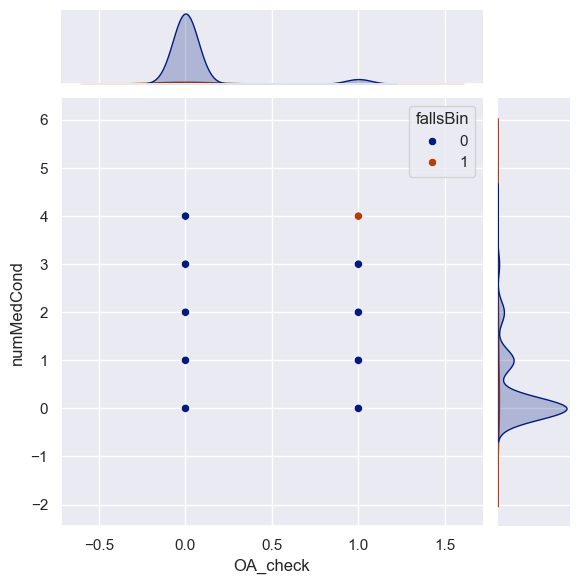

In [26]:
sns.jointplot(x='OA_check', y='numMedCond',hue='fallsBin', data=df, palette = 'dark')

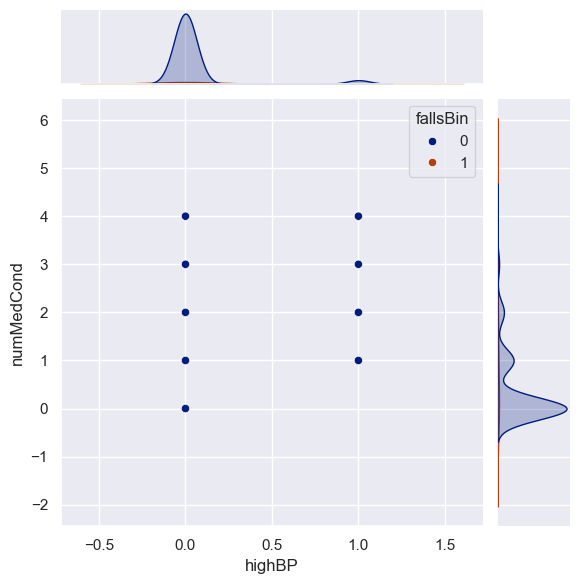

In [27]:
sns.jointplot(x='highBP', y='numMedCond',hue='fallsBin', data=df, palette = 'dark')

# 4. Feature engineering

## Outlier detection

Let's check the distribution of the features with 0,13 and higher and correlation

In [40]:
# c_true.columns = ['V17', 'V10', 'V12', 'V16', 'V14', 'V3', 'V7', 'V11', 'V4']
c_true.keys()[0]

'right_hip_max'

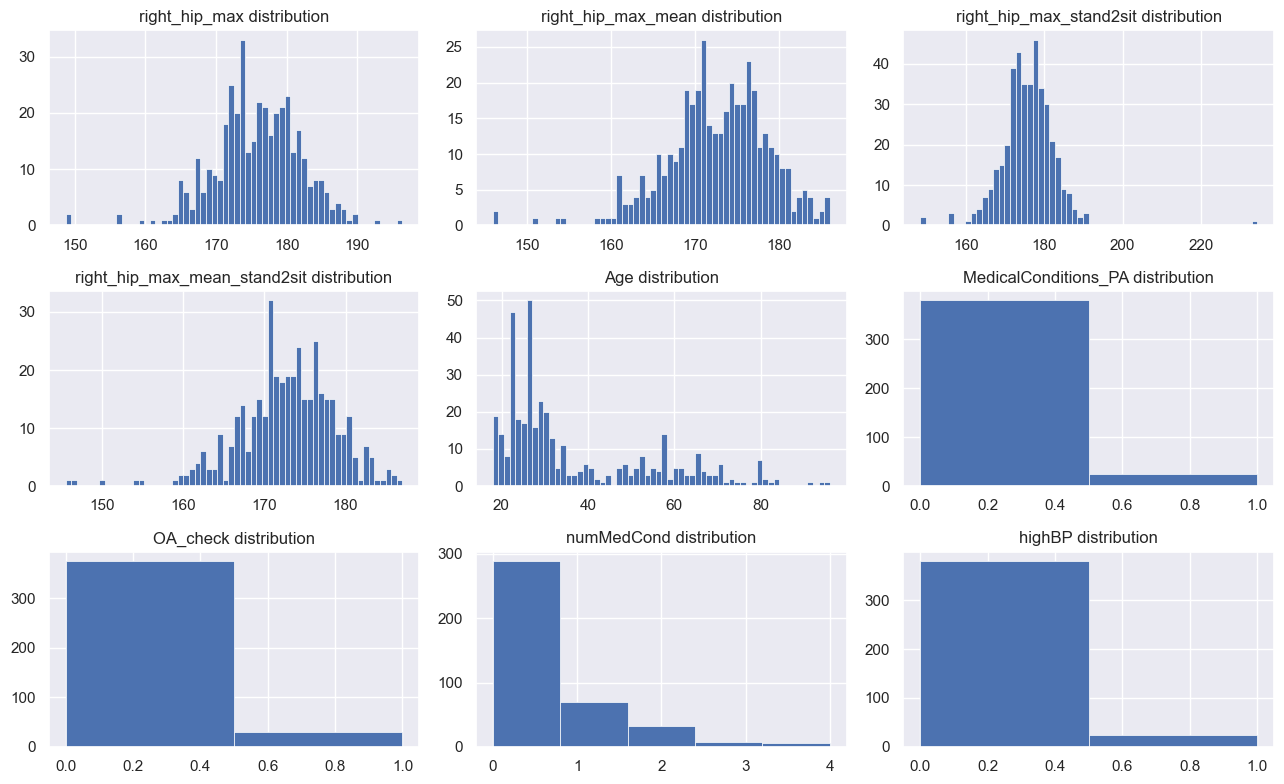

In [42]:
fig, axes = plt.subplots(nrows=3, ncols=3,figsize=(13,8))

axes[0,0].hist(df[c_true.keys()[0]], bins=60, linewidth=0.5, edgecolor="white")
axes[0,0].set_title(f"{c_true.keys()[0]} distribution");

axes[0,1].hist(df[c_true.keys()[1]], bins=60, linewidth=0.5, edgecolor="white")
axes[0,1].set_title(f"{c_true.keys()[1]} distribution");

axes[0,2].hist(df[c_true.keys()[2]], bins=60, linewidth=0.5, edgecolor="white")
axes[0,2].set_title(f"{c_true.keys()[2]} distribution");

axes[1,0].hist(df[c_true.keys()[3]], bins=60, linewidth=0.5, edgecolor="white")
axes[1,0].set_title(f"{c_true.keys()[3]} distribution");

axes[1,1].hist(df[c_true.keys()[4]], bins=60, linewidth=0.5, edgecolor="white")
axes[1,1].set_title(f"{c_true.keys()[4]} distribution");

axes[1,2].hist(df[c_true.keys()[5]], bins=2, linewidth=0.5, edgecolor="white")
axes[1,2].set_title(f"{c_true.keys()[5]} distribution");

axes[2,0].hist(df[c_true.keys()[6]], bins=2, linewidth=0.5, edgecolor="white")
axes[2,0].set_title(f"{c_true.keys()[6]} distribution");

axes[2,1].hist(df[c_true.keys()[7]], bins=5, linewidth=0.5, edgecolor="white")
axes[2,1].set_title(f"{c_true.keys()[7]} distribution");

axes[2,2].hist(df[c_true.keys()[8]], bins=2, linewidth=0.5, edgecolor="white")
axes[2,2].set_title(f"{c_true.keys()[8]} distribution");

plt.tight_layout()

It looks like we have a lot of outliers here. We can try to get rid of them.

## Tukey's IQR method

Tukey’s  (1977)  technique  is  used  to  detect  outliers  in  univariate  distributions  for symmetric as well as in slightly skewed data sets. The general rule is that anything not in the range of (Q1 - 1.5 IQR) and (Q3 + 1.5 IQR) is an outlier, and can be removed. 

In [55]:
def detect_outliers(df,n,features):
    """
    Takes a dataframe df of features and returns an index list corresponding to the observations 
    containing more than n outliers according to the Tukey IQR method.
    """
    outlier_indices = []
    
    # iterating over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determining a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # appending the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # selecting observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

# detecting outliers
Outliers_IQR = detect_outliers(df,2, c_true.keys())

# dropping outliers
df_out = df.drop(Outliers_IQR, axis = 0).reset_index(drop=True)

In [56]:
len(Outliers_IQR)

11

In [57]:
df_out

,time,time_diff,speed,time_sd,speed_sd,left_knee_range_mean,left_knee_sd,left_knee_max,left_knee_min,left_knee_max_mean,...,PA_cat,avgPEM,avgAAM,totalSEE,numMedCond,EthCat,backpain,depression,highBP,fallsBin
0,13.346667,-0.216883,0.37,0.395926,0.071269,69.628002,26.293871,188.856174,110.926374,184.429725,...,2,3.000000,4.8,4.666667,0,1,0,0,0,0
1,9.175833,0.108442,0.54,0.152175,0.044839,80.953823,30.219053,181.651735,96.723395,180.520050,...,2,2.142857,3.4,2.888889,0,1,0,0,0,0
2,13.791667,0.133333,0.36,0.234965,0.031573,72.900182,29.519413,184.377372,103.622265,180.242772,...,2,3.142857,5.2,6.777778,0,1,0,0,0,0
3,11.444767,-0.108442,0.44,0.225910,0.045701,71.881103,27.642812,186.287796,104.791805,179.420205,...,2,2.857143,4.8,5.333333,0,1,0,0,0,0
4,15.335196,0.290503,0.33,0.343064,0.033051,61.125035,24.674736,160.148816,93.006604,157.793916,...,1,2.714286,4.0,6.000000,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,10.066667,0.225000,0.50,0.344867,0.069775,80.150746,28.568481,175.792087,92.255016,173.916841,...,0,2.285714,2.8,2.444444,1,1,0,1,0,0
390,10.477133,0.116783,0.48,0.178317,0.044853,71.914595,26.895178,183.244510,108.111901,178.192663,...,2,2.857143,5.6,9.666667,0,2,0,0,0,0
391,5.366667,0.058333,0.93,0.082731,0.076364,88.648797,30.645203,185.623075,91.525068,178.939501,...,2,2.571429,5.0,9.777778,0,2,0,0,0,1
392,24.290933,0.075075,0.21,0.377854,0.016347,75.016879,28.222697,183.914542,101.991863,179.437229,...,2,2.571429,4.2,1.555556,2,4,1,0,0,0


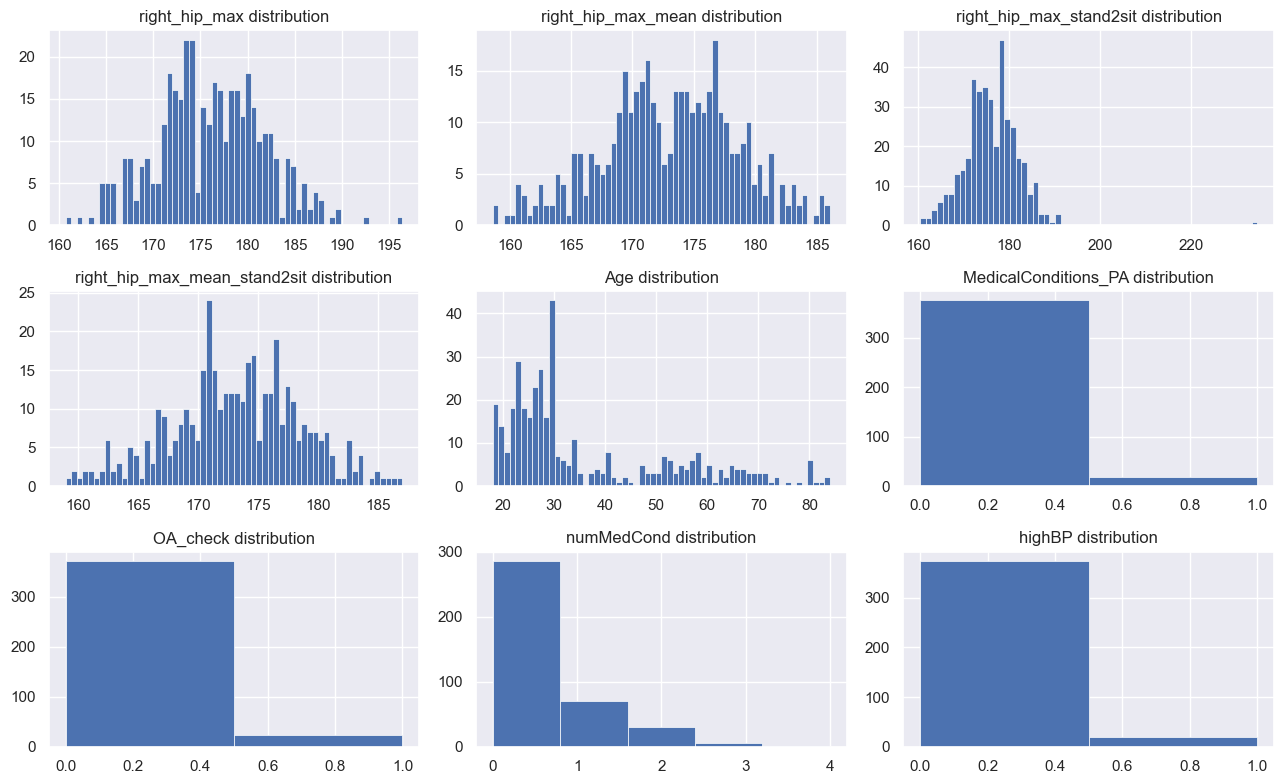

In [58]:
# Checking distributions of most important features after dropping outliers
fig, axes = plt.subplots(nrows=3, ncols=3,figsize=(13,8))

axes[0,0].hist(df_out[c_true.keys()[0]], bins=60, linewidth=0.5, edgecolor="white")
axes[0,0].set_title(f"{c_true.keys()[0]} distribution");

axes[0,1].hist(df_out[c_true.keys()[1]], bins=60, linewidth=0.5, edgecolor="white")
axes[0,1].set_title(f"{c_true.keys()[1]} distribution");

axes[0,2].hist(df_out[c_true.keys()[2]], bins=60, linewidth=0.5, edgecolor="white")
axes[0,2].set_title(f"{c_true.keys()[2]} distribution");

axes[1,0].hist(df_out[c_true.keys()[3]], bins=60, linewidth=0.5, edgecolor="white")
axes[1,0].set_title(f"{c_true.keys()[3]} distribution");

axes[1,1].hist(df_out[c_true.keys()[4]], bins=60, linewidth=0.5, edgecolor="white")
axes[1,1].set_title(f"{c_true.keys()[4]} distribution");

axes[1,2].hist(df_out[c_true.keys()[5]], bins=2, linewidth=0.5, edgecolor="white")
axes[1,2].set_title(f"{c_true.keys()[5]} distribution");

axes[2,0].hist(df_out[c_true.keys()[6]], bins=2, linewidth=0.5, edgecolor="white")
axes[2,0].set_title(f"{c_true.keys()[6]} distribution");

axes[2,1].hist(df_out[c_true.keys()[7]], bins=5, linewidth=0.5, edgecolor="white")
axes[2,1].set_title(f"{c_true.keys()[7]} distribution");

axes[2,2].hist(df_out[c_true.keys()[8]], bins=2, linewidth=0.5, edgecolor="white")
axes[2,2].set_title(f"{c_true.keys()[8]} distribution");

plt.tight_layout()

Now features look much more "normal"!

In [59]:
# Let's check if we didn't drop too many important information accidentally

In [60]:
print ('The amount of frauds in df before dropping outliers: ', len(df[df['fallsBin'] == 1]))

The amount of frauds in df before dropping outliers:  34


In [61]:
print ('The amount of frauds in df afret dropping outliers: ', len(df_out[df_out['fallsBin'] == 1]))

The amount of frauds in df afret dropping outliers:  27


It looks like outliers are very similar to fraud values and we dropped most of them!

Let's create a new df with dropped outliers only.

In [62]:
Outliers_df2 = df.loc[df.index[Outliers_IQR]]

In [63]:
len(Outliers_df2)

11

In [64]:
Outliers_df2

,time,time_diff,speed,time_sd,speed_sd,left_knee_range_mean,left_knee_sd,left_knee_max,left_knee_min,left_knee_max_mean,...,PA_cat,avgPEM,avgAAM,totalSEE,numMedCond,EthCat,backpain,depression,highBP,fallsBin
64,16.950267,-0.150150,0.29,0.620512,0.062843,53.263882,21.023718,181.039681,116.776350,178.333388,...,0,3.142857,4.6,4.666667,4,1,1,0,1,1
100,9.900000,-0.100000,0.51,0.189268,0.047936,97.853606,33.752710,179.213407,74.146038,173.386532,...,2,3.285714,5.2,9.000000,0,1,0,0,0,0
125,24.657967,-0.258592,0.20,0.412669,0.016324,57.821855,20.534975,152.775083,86.784403,149.163590,...,0,2.714286,5.2,7.888889,2,1,1,0,0,1
246,13.208333,-0.155556,0.38,0.228977,0.033226,62.667761,23.255752,150.001030,74.597784,141.057238,...,2,2.714286,3.4,4.666667,0,1,0,0,0,1
257,6.737430,0.041899,0.74,0.090936,0.055021,89.732301,33.354011,168.006513,72.302867,166.426288,...,2,3.142857,5.0,8.555556,0,1,0,0,0,0
124,21.466667,-0.350000,0.23,0.617666,0.040455,68.790050,25.790794,155.357797,82.176667,152.318068,...,0,2.714286,4.8,7.555556,4,1,1,0,1,1
0,18.752067,-0.275275,0.27,0.631539,0.058177,66.356510,29.013062,174.921910,92.965645,173.194095,...,2,3.142857,5.0,7.333333,3,1,0,0,0,0
42,15.415400,0.025025,0.32,0.292867,0.030124,86.176745,33.942546,177.162448,81.334365,174.016490,...,1,3.428571,5.0,4.333333,3,1,0,0,0,0
181,10.073579,0.010033,0.50,0.122786,0.031139,65.511936,26.102240,182.397781,104.172692,176.012022,...,2,2.857143,4.4,7.666667,2,2,0,0,1,1
294,17.183833,-0.275275,0.29,0.549892,0.059515,98.457475,28.326279,186.288491,69.795019,181.253226,...,1,3.285714,2.4,8.888889,4,1,1,0,1,1


# 5. Modelling

## 1st data frame

In [65]:
# Train/Test split

X = Outliers_df2.drop('fallsBin',axis=1).values
y = Outliers_df2['fallsBin'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [66]:
# Scaling data

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [67]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [71]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

In [72]:
X_train.shape

(8, 526)

In [73]:
model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

model.add(Dense(units=29,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=14,activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(units=7,activation='relu'))
#model.add(Dropout(0.1))

model.add(Dense(units=2,activation='relu'))

model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

In [74]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=2, patience=35)

In [75]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=3000,
          validation_data=(X_test, y_test), verbose=2,
          callbacks=[early_stop]
          )

Epoch 1/3000
1/1 - 2s - 2s/step - loss: 0.6770 - val_loss: 0.6926
Epoch 2/3000
1/1 - 0s - 48ms/step - loss: 0.6760 - val_loss: 0.6921
Epoch 3/3000
1/1 - 0s - 47ms/step - loss: 0.6669 - val_loss: 0.6917
Epoch 4/3000
1/1 - 0s - 48ms/step - loss: 0.6817 - val_loss: 0.6912
Epoch 5/3000
1/1 - 0s - 47ms/step - loss: 0.6547 - val_loss: 0.7313
Epoch 6/3000
1/1 - 0s - 49ms/step - loss: 0.6136 - val_loss: 0.7826
Epoch 7/3000
1/1 - 0s - 54ms/step - loss: 0.7004 - val_loss: 0.8144
Epoch 8/3000
1/1 - 0s - 46ms/step - loss: 0.6602 - val_loss: 0.8478
Epoch 9/3000
1/1 - 0s - 47ms/step - loss: 0.6658 - val_loss: 0.8484
Epoch 10/3000
1/1 - 0s - 49ms/step - loss: 0.6152 - val_loss: 0.8432
Epoch 11/3000
1/1 - 0s - 48ms/step - loss: 0.6321 - val_loss: 0.8429
Epoch 12/3000
1/1 - 0s - 49ms/step - loss: 0.6909 - val_loss: 0.8371
Epoch 13/3000
1/1 - 0s - 46ms/step - loss: 0.5994 - val_loss: 0.8296
Epoch 14/3000
1/1 - 0s - 47ms/step - loss: 0.5948 - val_loss: 0.8172
Epoch 15/3000
1/1 - 0s - 46ms/step - loss: 0.

<Axes: >

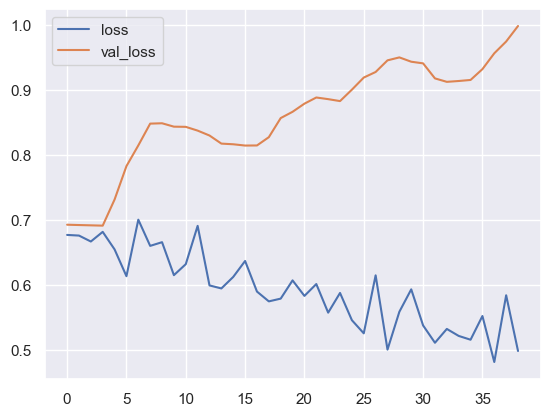

In [76]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [77]:
predictions = (model.predict(X_test) > 0.5)*1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


In [78]:
from sklearn.metrics import classification_report,confusion_matrix

In [79]:
# https://en.wikipedia.org/wiki/Precision_and_recall
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.33      0.50         3

    accuracy                           0.33         3
   macro avg       0.50      0.17      0.25         3
weighted avg       1.00      0.33      0.50         3



e:\PhD Work (Local)\Sit to Stand Fall Risk\sit2stand-fall\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\PhD Work (Local)\Sit to Stand Fall Risk\sit2stand-fall\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\PhD Work (Local)\Sit to Stand Fall Risk\sit2stand-fall\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [80]:
print(confusion_matrix(y_test,predictions))

[[0 0]
 [2 1]]


In [81]:
cm_df = pd.DataFrame(confusion_matrix(y_test,predictions))
cm_df.columns = ['Predicted 0','Predicted 1']
cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,0,0
Actual 1,2,1


In [82]:
from sklearn.metrics import f1_score

In [83]:
f1 = f1_score(y_test, predictions)
print (f1)

0.5


In [84]:
CM = confusion_matrix(y_test,predictions)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

In [85]:
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

C:\Users\m93107ma\AppData\Local\Temp\ipykernel_26008\933006192.py:4: RuntimeWarning: invalid value encountered in scalar divide
  TNR = TN/(TN+FP)
C:\Users\m93107ma\AppData\Local\Temp\ipykernel_26008\933006192.py:10: RuntimeWarning: invalid value encountered in scalar divide
  FPR = FP/(FP+TN)


In [86]:
ACC

0.3333333333333333

## 2nd data frame

In [87]:
# Train/Test split

X = df_out.drop('fallsBin',axis=1).values
y = df_out['fallsBin'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [ ]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [88]:
X_train.shape

(295, 526)

In [89]:
model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

model.add(Dense(units=29,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=14,activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(units=7,activation='relu'))
#model.add(Dropout(0.1))

model.add(Dense(units=2,activation='relu'))

model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

In [90]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=2, patience=35)

In [91]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=3000,
          validation_data=(X_test, y_test), verbose=2,
          callbacks=[early_stop]
          )

Epoch 1/3000
10/10 - 1s - 137ms/step - loss: 71.9499 - val_loss: 14.4788
Epoch 2/3000
10/10 - 0s - 6ms/step - loss: 25.0625 - val_loss: 0.6850
Epoch 3/3000
10/10 - 0s - 6ms/step - loss: 5.3772 - val_loss: 0.6811
Epoch 4/3000
10/10 - 0s - 6ms/step - loss: 6.9997 - val_loss: 0.6772
Epoch 5/3000
10/10 - 0s - 6ms/step - loss: 10.7127 - val_loss: 0.6733
Epoch 6/3000
10/10 - 0s - 6ms/step - loss: 2.9118 - val_loss: 0.6695
Epoch 7/3000
10/10 - 0s - 6ms/step - loss: 1.1569 - val_loss: 0.6658
Epoch 8/3000
10/10 - 0s - 6ms/step - loss: 2.1310 - val_loss: 0.6620
Epoch 9/3000
10/10 - 0s - 7ms/step - loss: 6.0663 - val_loss: 0.6582
Epoch 10/3000
10/10 - 0s - 6ms/step - loss: 0.6564 - val_loss: 0.6544
Epoch 11/3000
10/10 - 0s - 6ms/step - loss: 11.7514 - val_loss: 0.6506
Epoch 12/3000
10/10 - 0s - 6ms/step - loss: 1.4786 - val_loss: 0.6469
Epoch 13/3000
10/10 - 0s - 6ms/step - loss: 3.2461 - val_loss: 0.6432
Epoch 14/3000
10/10 - 0s - 6ms/step - loss: 4.3666 - val_loss: 0.6394
Epoch 15/3000
10/10 - 

<Axes: >

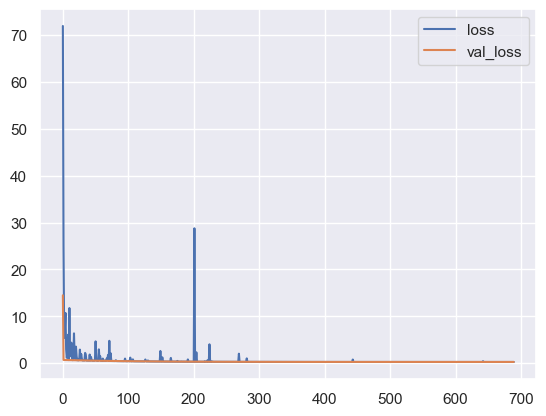

In [92]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [93]:
predictions_2nd = (model.predict(X_test) > 0.5)*1

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [94]:
# https://en.wikipedia.org/wiki/Precision_and_recall
print(classification_report(y_test,predictions_2nd))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        92
           1       0.00      0.00      0.00         7

    accuracy                           0.93        99
   macro avg       0.46      0.50      0.48        99
weighted avg       0.86      0.93      0.90        99



e:\PhD Work (Local)\Sit to Stand Fall Risk\sit2stand-fall\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\PhD Work (Local)\Sit to Stand Fall Risk\sit2stand-fall\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\PhD Work (Local)\Sit to Stand Fall Risk\sit2stand-fall\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [95]:
print(confusion_matrix(y_test,predictions_2nd))

[[92  0]
 [ 7  0]]


In [96]:
cm_df = pd.DataFrame(confusion_matrix(y_test,predictions_2nd))
cm_df.columns = ['Predicted 0','Predicted 1']
cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,92,0
Actual 1,7,0


In [97]:
CM = confusion_matrix(y_test,predictions_2nd)

TN_2nd = CM[0][0]
FN_2nd = CM[1][0]
TP_2nd = CM[1][1]
FP_2nd = CM[0][1]

In [98]:
# Sensitivity, hit rate, recall, or true positive rate
TPR_2nd = TP_2nd/(TP_2nd+FN_2nd)
# Specificity or true negative rate
TNR_2nd = TN_2nd/(TN_2nd+FP_2nd) 
# Precision or positive predictive value
PPV_2nd = TP_2nd/(TP_2nd+FP_2nd)
# Negative predictive value
NPV_2nd = TN_2nd/(TN_2nd+FN_2nd)
# Fall out or false positive rate
FPR_2nd = FP_2nd/(FP_2nd+TN_2nd)
# False negative rate
FNR_2nd = FN_2nd/(TP_2nd+FN_2nd)
# False discovery rate
FDR_2nd = FP_2nd/(TP_2nd+FP_2nd)

# Overall accuracy
ACC_2nd = (TP_2nd+TN_2nd)/(TP_2nd+FP_2nd+FN_2nd+TN_2nd)

C:\Users\m93107ma\AppData\Local\Temp\ipykernel_26008\4283872565.py:6: RuntimeWarning: invalid value encountered in scalar divide
  PPV_2nd = TP_2nd/(TP_2nd+FP_2nd)
C:\Users\m93107ma\AppData\Local\Temp\ipykernel_26008\4283872565.py:14: RuntimeWarning: invalid value encountered in scalar divide
  FDR_2nd = FP_2nd/(TP_2nd+FP_2nd)


In [99]:
ACC_2nd

0.9292929292929293

In [100]:
f1_2nd = f1_score(y_test, predictions_2nd)
print (f1_2nd)

0.0


# 6. Combining results

In [101]:
# COmbining both confusion matrices

TN_final = TN + TN_2nd
FN_final = FN + FN_2nd
TP_final = TP + TP_2nd
FP_final = FP + FP_2nd

# Sensitivity, hit rate, recall, or true positive rate
TPR_final = TP_final/(TP_final+FN_final)

# Precision or positive predictive value
PPV_final = TP_final/(TP_final+FP_final)

# Overall accuracy
ACC_final = (TP_final+TN_final)/(TP_final+FP_final+FN_final+TN_final)

F1_score = 2*((PPV_final*TPR_final)/(PPV_final+TPR_final))

In [102]:
cm_df = pd.DataFrame(np.array([[TN_final, FP_final], [FN_final, TP_final]]), columns=['Predicted 0', 'Predicted 1'])
cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})

cm_df

,Predicted 0,Predicted 1
Actual 0,92,0
Actual 1,9,1


Combined confusion matrix

In [103]:
print('Overall accuracy final score: ', ACC_final)

Overall accuracy final score:  0.9117647058823529


In [104]:
print('Overall F1 final score: ', F1_score)

Overall F1 final score:  0.18181818181818182
